In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shrutiijainn11","key":"c5f324c66a6cbfd8623ecd48ce2cc842"}'}

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_251.jpg', 'with_mask_1960.jpg', 'with_mask_1256.jpg', 'with_mask_1115.jpg', 'with_mask_2334.jpg']
['with_mask_2479.jpg', 'with_mask_2356.jpg', 'with_mask_3027.jpg', 'with_mask_2858.jpg', 'with_mask_301.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2464.jpg', 'without_mask_2320.jpg', 'without_mask_971.jpg', 'without_mask_3055.jpg', 'without_mask_1233.jpg']
['without_mask_1774.jpg', 'without_mask_816.jpg', 'without_mask_3080.jpg', 'without_mask_2992.jpg', 'without_mask_3334.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


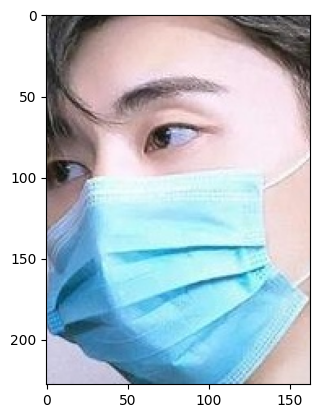

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')        #imread - reads images in the form of numpy array
imgplot = plt.imshow(img)
plt.show()

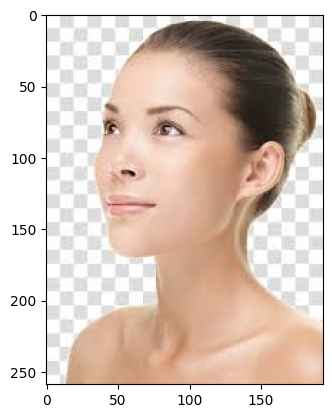

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'      # / - automatically concatinate images through img_file

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)      #open - reading image one by one
  image = image.resize((128,128))    #size in limit of the image dimensions
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 48,  54,  66],
        [ 48,  54,  66],
        [ 47,  53,  65],
        ...,
        [ 75,  90, 103],
        [ 78,  92, 102],
        [ 79,  92, 101]],

       [[ 47,  53,  65],
        [ 46,  52,  64],
        [ 45,  51,  63],
        ...,
        [ 72,  87, 100],
        [ 76,  89, 100],
        [ 77,  90,  99]],

       [[ 46,  52,  64],
        [ 46,  52,  64],
        [ 45,  51,  63],
        ...,
        [ 69,  83,  97],
        [ 74,  87,  97],
        [ 75,  88,  98]],

       ...,

       [[255, 146, 157],
        [254, 144, 155],
        [249, 138, 149],
        ...,
        [151,  24,  27],
        [169,  38,  45],
        [182,  48,  58]],

       [[244, 129, 138],
        [237, 122, 132],
        [223, 108, 118],
        ...,
        [142,  17,  20],
        [158,  29,  34],
        [169,  38,  46]],

       [[211,  95, 104],
        [204,  88,  97],
        [191,  75,  84],
        ...,
        [133,   9,  11],
        [146,  18,  22],
        [157,  25,  31]]], dtype=uint8)
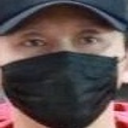

In [19]:
data[0]

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255
#model performs better when images are scaled

array([[[ 80,  40,  46],
        [ 87,  44,  50],
        [ 92,  42,  50],
        ...,
        [ 46,  45,  41],
        [ 45,  44,  40],
        [ 44,  43,  39]],

       [[ 64,  33,  37],
        [ 71,  39,  41],
        [ 79,  39,  45],
        ...,
        [ 53,  48,  46],
        [ 52,  47,  46],
        [ 52,  47,  46]],

       [[ 47,  29,  30],
        [ 53,  34,  34],
        [ 62,  37,  39],
        ...,
        [ 57,  48,  49],
        [ 56,  47,  48],
        [ 55,  46,  47]],

       ...,

       [[107,  74,  63],
        [105,  71,  61],
        [110,  74,  63],
        ...,
        [ 49,  47,  48],
        [ 49,  47,  48],
        [ 50,  48,  49]],

       [[107,  71,  62],
        [108,  72,  63],
        [108,  72,  60],
        ...,
        [ 50,  47,  47],
        [ 51,  48,  47],
        [ 52,  49,  48]],

       [[108,  71,  62],
        [108,  71,  62],
        [108,  72,  60],
        ...,
        [ 51,  47,  46],
        [ 52,  48,  47],
        [ 53,  49,  48]]], dtype=uint8)
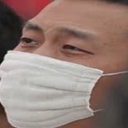

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[0.31372549, 0.15686275, 0.18039216],
        [0.34117647, 0.17254902, 0.19607843],
        [0.36078431, 0.16470588, 0.19607843],
        ...,
        [0.18039216, 0.17647059, 0.16078431],
        [0.17647059, 0.17254902, 0.15686275],
        [0.17254902, 0.16862745, 0.15294118]],

       [[0.25098039, 0.12941176, 0.14509804],
        [0.27843137, 0.15294118, 0.16078431],
        [0.30980392, 0.15294118, 0.17647059],
        ...,
        [0.20784314, 0.18823529, 0.18039216],
        [0.20392157, 0.18431373, 0.18039216],
        [0.20392157, 0.18431373, 0.18039216]],

       [[0.18431373, 0.11372549, 0.11764706],
        [0.20784314, 0.13333333, 0.13333333],
        [0.24313725, 0.14509804, 0.15294118],
        ...,
        [0.22352941, 0.18823529, 0.19215686],
        [0.21960784, 0.18431373, 0.18823529],
        [0.21568627, 0.18039216, 0.18431373]],

       ...,

       [[0.41960784, 0.29019608, 0.24705882],
        [0.41176471, 0.27843137, 0.23921569],
        [0.43137255, 0

**Building CNN**

In [31]:
import tensorflow as tf
from tensorflow import keras
#keras doesn't run individually. it needs tensorflow or pytorch as backend

In [39]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#input_shape should be present only in the first layer

#in next layer only filter size is changing
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
#by using flatten 2D(matrix) data is converted into 1D(vector) which can be passed further

model.add(keras.layers.Dense(128, activation='relu'))
#here 128(std numbers = 128, 256,...powers of 2) is the total number of neurons you add in the network

model.add(keras.layers.Dropout(0.5))
#reduces the risk of model getting overfitted

#another layer added
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
#total number of classes in the data = number of neurons
#sigmoid is used for binary classification problem


In [40]:
#compile neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',     #numerical encoder label
              metrics=['acc'])   #acc = accuracy

In [41]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
#validation_split = how model is performing for unknown data at each epoch

Epoch 1/5
170/170 [==============================] - 5s 21ms/step - loss: 0.5207 - acc: 0.7563 - val_loss: 0.3362 - val_acc: 0.8562
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2942 - acc: 0.8873 - val_loss: 0.2505 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2527 - acc: 0.9003 - val_loss: 0.2269 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2026 - acc: 0.9209 - val_loss: 0.2350 - val_acc: 0.8992
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1730 - acc: 0.9342 - val_loss: 0.2102 - val_acc: 0.9240


**Model Evalutaion**

In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2057 - acc: 0.9252
Test Accuracy =  0.9252150654792786


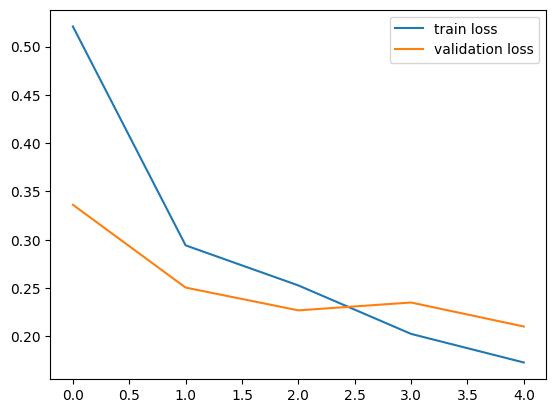

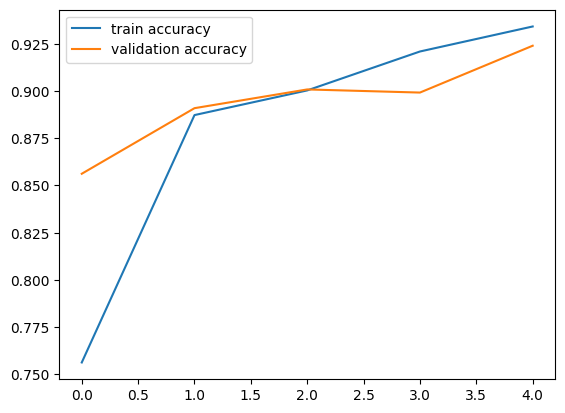

In [43]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


**Predictive System**

Path of the image to be predicted: /content/without_mask.jpeg


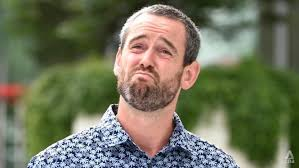

1/1 [==============================] - 0s 19ms/step
[[0.5338342 0.5361389]]
1
The person is not wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image) #print input image

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
#reshaping to specify the model that we are predicting for only 1 image

input_prediction = model.predict(input_image_reshaped)
#list containing 2 probablity values and we have to choose the one with higher probability
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
#if first value is max it will return 0, if second is max it will return 1
print(input_pred_label)

if input_pred_label == 1:
  print('The person is not wearing a mask')
else:
  print('The person is wearing a mask')


Path of the image to be predicted: /content/with_mask.jpeg


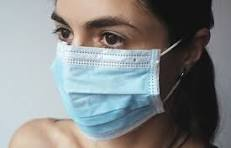

1/1 [==============================] - 0s 22ms/step
[[0.85570186 0.21442075]]
0
The person is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image) #print input image

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
#reshaping to specify the model that we are predicting for only 1 image

input_prediction = model.predict(input_image_reshaped)
#list containing 2 probablity values and we have to choose the one with higher probability
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
#if first value is max it will return 0, if second is max it will return 1
print(input_pred_label)

if input_pred_label == 1:
  print('The person is not wearing a mask')

else:
  print('The person is wearing a mask')

Path of the image to be predicted: /content/with_mask2.jpeg


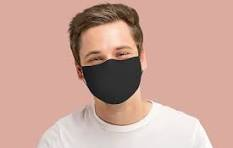

1/1 [==============================] - 0s 34ms/step
[[0.55807465 0.4948006 ]]
0
The person is wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image) #print input image

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
#reshaping to specify the model that we are predicting for only 1 image

input_prediction = model.predict(input_image_reshaped)
#list containing 2 probablity values and we have to choose the one with higher probability
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
#if first value is max it will return 0, if second is max it will return 1
print(input_pred_label)

if input_pred_label == 1:
  print('The person is not wearing a mask')

else:
  print('The person is wearing a mask')

Path of the image to be predicted: /content/without_mask2.jpeg


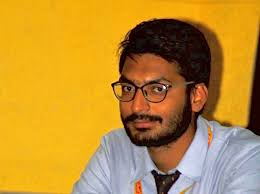

1/1 [==============================] - 0s 19ms/step
[[0.25814214 0.96370536]]
1
The person is not wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image) #print input image

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
#reshaping to specify the model that we are predicting for only 1 image

input_prediction = model.predict(input_image_reshaped)
#list containing 2 probablity values and we have to choose the one with higher probability
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
#if first value is max it will return 0, if second is max it will return 1
print(input_pred_label)

if input_pred_label == 1:
  print('The person is not wearing a mask')

else:
  print('The person is wearing a mask')